In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.cluster import KMeans

with open('new.pkl', 'rb') as f:
    cluster_labels = pickle.load(f)
    
dataset = pd.read_csv('final_1102022.csv')
dataset['cluster_id'] = cluster_labels

In [2]:
## DROP WHERE # OF DATAPOINTS < 5 (cannot cluster at all)
cluster_sizes = dataset.groupby(['cluster_id']).cluster_id.size()
bad_clusters = cluster_sizes.where(lambda x: x < 5).dropna()
print("dropping clusters: ", bad_clusters.index)

dataset = dataset.loc[~dataset['cluster_id'].isin(bad_clusters.index)]

clusters = dataset.cluster_id.unique()
print("has clusters: ", clusters, " len = ", len(clusters))

dropping clusters:  Int64Index([3, 4, 48, 51, 85], dtype='int64', name='cluster_id')
has clusters:  [37 40 53 63 78 57 23 67 77 69 35 66 20 26 70 52 62 72 21 82 13 87 27 80
 25 61 81 32 46 68 74 17 29 38 28 33 16 45 42 10 19 76  2 39 65 22 41 79
 86 34 84 49 71 59  0 58 43 24 83 18  1 15 73 54 50 44 64  6 30 31 56 47
  7 55 75 12 11 36  9 60  8  5 14]  len =  83


In [3]:
#kmeans = [KMeans(n_clusters=5).fit(np.array(dataset.loc[dataset.cluster_id == cid]['GM%'].array).reshape(-1, 1)) for cid in cluster_labels]

kmeans_objs = [] # list of tuples - cluster id, corresponding KMeans obj
for cid in clusters:
    data = np.array(dataset.loc[dataset.cluster_id == cid]['GM%'].array).reshape(-1, 1)
    #print("training KMeans on {} datapoints for cluster {}".format(data.shape[0], cid))
    kmeans = KMeans(n_clusters=5).fit(data)
    kmeans_objs.append((cid, kmeans))

In [4]:
# dataset diff between max and min GM%
print("in entire dataset, gm% range: ", dataset['GM%'].max() - dataset['GM%'].min())

dgb = dataset.groupby(['cluster_id'])
gm_ranges = (dgb['GM%'].max() - dgb['GM%'].min())
print(gm_ranges)



in entire dataset, gm% range:  415051.461722488
cluster_id
0     9801.000000
1      367.856163
2     2727.069624
5        2.352332
6       71.409091
         ...     
82     487.670000
83      56.166667
84     151.480658
86      52.759006
87     159.300481
Name: GM%, Length: 83, dtype: float64


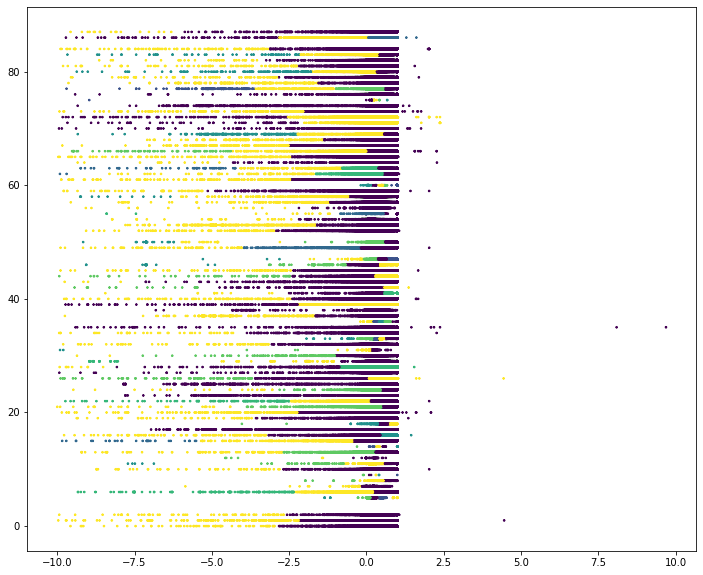

In [5]:


# assign price grades for each cluster centroid/labels
import matplotlib.pyplot as plt
for cid, kmeans in kmeans_objs:
    dataset.loc[dataset.cluster_id == cid, 'price_grade_cluster_ind'] = kmeans.labels_

dataset['price_grade_cluster_ind'] = dataset['price_grade_cluster_ind'].astype(int)

dataset = dataset.loc[dataset['GM%'] >= -10]
dataset = dataset.loc[dataset['GM%'] <= 10]

fig = plt.gcf()
fig.set_size_inches(12, 10)

i = 0
for cid in clusters:
    data = dataset.loc[dataset.cluster_id == cid]
    
    plt.scatter(data['GM%'], [cid]*data.shape[0], marker='x', s=3,c=data['price_grade_cluster_ind'])
fig.savefig('test2png.png', dpi=200)


In [6]:

"""
>>> from sklearn.cluster import KMeans
>>> import numpy as np
>>> X = np.array([[1, 2], [1, 4], [1, 0],
...               [10, 2], [10, 4], [10, 0]])
>>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
>>> kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
>>> kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
>>> kmeans.cluster_centers_
array([[10.,  2.],
       [ 1.,  2.]])"""

'\nfrom sklearn.cluster import KMeans\nimport numpy as np\nX = np.array([[1, 2], [1, 4], [1, 0],\n              [10, 2], [10, 4], [10, 0]])\nkmeans = KMeans(n_clusters=2, random_state=0).fit(X)\nkmeans.labels_\narray([1, 1, 1, 0, 0, 0], dtype=int32)\nkmeans.predict([[0, 0], [12, 3]])\narray([1, 0], dtype=int32)\nkmeans.cluster_centers_\narray([[10.,  2.],\n       [ 1.,  2.]])'